'''
@Author: Pavan Nakate
@Date: 2022-01-03 03:30
@Last Modified by: Pavan Nakate
@Last Modified time: None
@Title : CPU-Logs Prblem using pyspark 
'''

In [1]:
import findspark
findspark.init('/home/pavan-linux/Spark/spark-3.1.2-bin-hadoop2.7')

In [2]:
from pyspark.sql import *
spark = SparkSession.builder.getOrCreate()
from pyspark.sql.functions import *

22/01/04 08:44:44 WARN Utils: Your hostname, pavanlinux resolves to a loopback address: 127.0.0.1; using 10.0.2.15 instead (on interface enp0s3)
22/01/04 08:44:44 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
22/01/04 08:44:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [3]:
df = spark.read.csv("/home/pavan-linux/Spark-WordCount/*.csv", header=True)

To select only required columns for the calculations

In [4]:
df1 = df.select("user_name","DateTime","keyboard","mouse")
df1.show()

+--------------------+-------------------+--------+------+
|           user_name|           DateTime|keyboard| mouse|
+--------------------+-------------------+--------+------+
|  iamnzm@outlook.com|2019-09-19 08:40:02|     1.0|  32.0|
|  iamnzm@outlook.com|2019-09-19 08:45:02|     0.0|   0.0|
|  iamnzm@outlook.com|2019-09-19 08:50:01|     0.0|   0.0|
|  iamnzm@outlook.com|2019-09-19 08:55:01|    11.0| 900.0|
|  iamnzm@outlook.com|2019-09-19 09:00:01|     2.0|  25.0|
|  iamnzm@outlook.com|2019-09-19 09:05:01|    37.0| 336.0|
|deepshukla292@gma...|2019-09-19 09:05:01|     0.0|  55.0|
|  iamnzm@outlook.com|2019-09-19 09:10:01|     0.0| 136.0|
|deepshukla292@gma...|2019-09-19 09:10:01|     6.0|1112.0|
|  iamnzm@outlook.com|2019-09-19 09:15:02|     0.0|  84.0|
|deepshukla292@gma...|2019-09-19 09:15:02|     0.0| 357.0|
|markfernandes66@g...|2019-09-19 09:15:01|    20.0| 670.0|
|markfernandes66@g...|2019-09-19 09:10:01|    17.0|   0.0|
|markfernandes66@g...|2019-09-19 09:20:01|    29.0|1895.

To get the counts of user from the all the csv files and bar for the counts and users

In [5]:
df2 = df1.groupBy("user_name").count()
df2.show()

+--------------------+-----+
|           user_name|count|
+--------------------+-----+
|salinabodale73@gm...|  569|
|sharlawar77@gmail...|  580|
|rahilstar11@gmail...|  551|
|deepshukla292@gma...|  565|
|  iamnzm@outlook.com|  614|
|markfernandes66@g...|  508|
|damodharn21@gmail...|  253|
|bhagyashrichalke2...|  482|
+--------------------+-----+



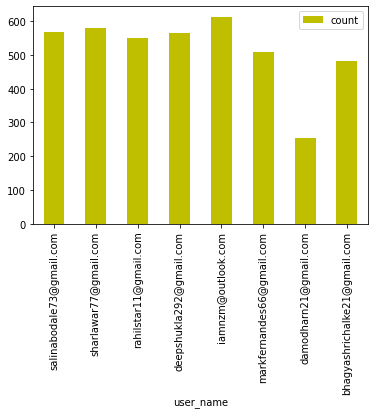

In [6]:
from matplotlib import pyplot as plt

try:
    pdf=df2.toPandas()
    pdf.plot.bar(x='user_name', y='count',color = 'y')
    plt.show()
except Exception as e:
    print(e)

In [7]:
df.createOrReplaceTempView("working_counts")

22/01/04 08:45:05 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


To count the users who are working i.e. keyboard and mouse is not 0.0 meams they are working and plot gor the same

In [8]:
df3=spark.sql("SELECT user_name FROM working_counts WHERE keyboard!=0 or mouse!=0").groupBy("user_name").count()
df3.show()

+--------------------+-----+
|           user_name|count|
+--------------------+-----+
|salinabodale73@gm...|  436|
|sharlawar77@gmail...|  457|
|rahilstar11@gmail...|  399|
|deepshukla292@gma...|  475|
|  iamnzm@outlook.com|  459|
|markfernandes66@g...|  389|
|damodharn21@gmail...|  191|
|bhagyashrichalke2...|  361|
+--------------------+-----+



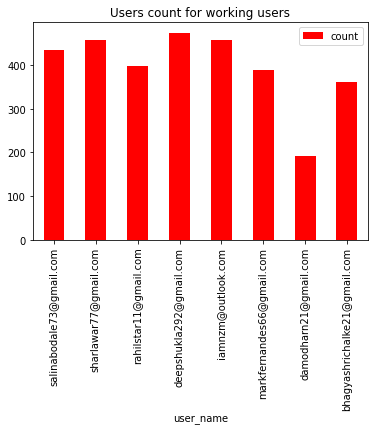

In [9]:
try:
    pdf1=df3.toPandas()
    pdf1.plot.bar(x='user_name', y='count',color = 'r')
    plt.title("Users count for working users")
    plt.show()
except Exception as e:
    print(e)

In [10]:
df3.createOrReplaceTempView("average_sec")

To get the average working seconds of users.

In [11]:
df4=spark.sql("SELECT user_name,count,(((((count)*5)*60)/6)) as avg_sec FROM average_sec")
df4.show()

+--------------------+-----+-------+
|           user_name|count|avg_sec|
+--------------------+-----+-------+
|salinabodale73@gm...|  436|21800.0|
|sharlawar77@gmail...|  457|22850.0|
|rahilstar11@gmail...|  399|19950.0|
|deepshukla292@gma...|  475|23750.0|
|  iamnzm@outlook.com|  459|22950.0|
|markfernandes66@g...|  389|19450.0|
|damodharn21@gmail...|  191| 9550.0|
|bhagyashrichalke2...|  361|18050.0|
+--------------------+-----+-------+



In [12]:
from pyspark.sql.functions import *

highest_avg_hour = df4.withColumn("average_hours", concat(floor(col("avg_sec") % 86400 / 3600), lit(":"),floor((col("avg_sec") % 86400) % 3600 / 60), lit(""),)).drop("avg_sec")

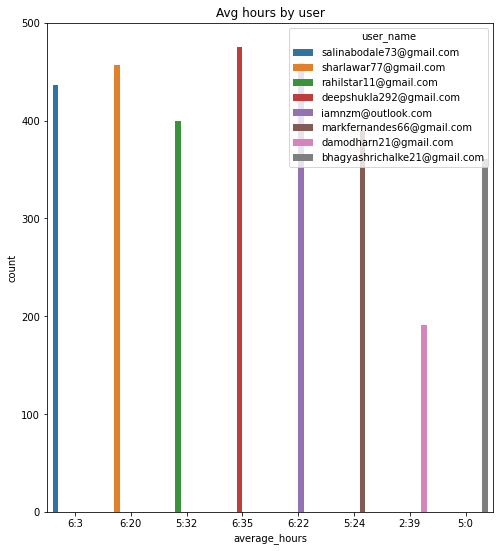

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt

pdf3 = highest_avg_hour.toPandas()
plt.figure(figsize = (8,9))
sns.barplot(x = 'average_hours',y='count',data = pdf3,hue='user_name')
plt.title("Avg hours by user")
plt.ylim(0,500)
plt.show()

In [14]:
highest_avg_hour.createOrReplaceTempView("working_hour")

User with maximum and minimum working hours.

In [15]:
spark.sql("SELECT user_name as `user with highest avg hour`,average_hours  FROM working_hour WHERE average_hours = (SELECT MAX(average_hours) FROM working_hour)").show()

+--------------------------+-------------+
|user with highest avg hour|average_hours|
+--------------------------+-------------+
|      deepshukla292@gma...|         6:35|
+--------------------------+-------------+



In [16]:
spark.sql("SELECT user_name as `user with lowest avg hour`,average_hours FROM working_hour WHERE average_hours = (SELECT MIN(average_hours) FROM working_hour)").show()

+-------------------------+-------------+
|user with lowest avg hour|average_hours|
+-------------------------+-------------+
|     damodharn21@gmail...|         2:39|
+-------------------------+-------------+



For the idle counts of user Mouse anf Keyboard are 0.

In [17]:
df5=spark.sql("SELECT user_name FROM working_counts WHERE keyboard=0 and mouse=0").groupBy("user_name").count()
df5.show()

+--------------------+-----+
|           user_name|count|
+--------------------+-----+
|salinabodale73@gm...|  133|
|sharlawar77@gmail...|  123|
|rahilstar11@gmail...|  152|
|deepshukla292@gma...|   90|
|  iamnzm@outlook.com|  155|
|markfernandes66@g...|  119|
|damodharn21@gmail...|   62|
|bhagyashrichalke2...|  121|
+--------------------+-----+



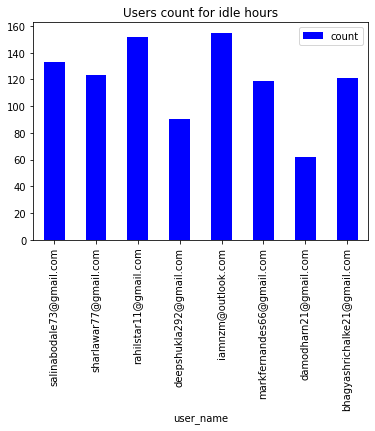

In [18]:
import matplotlib.pyplot as plt

try:
    pdf4=df5.toPandas()
    pdf4.plot.bar(x='user_name', y='count',color = 'b')
    plt.title("Users count for idle hours")
    plt.show()
except Exception as e:
    print(e)


To get average idle seconds of user.

In [19]:
df5.createOrReplaceTempView("idleHrs_by_user")
idle_sec=spark.sql("SELECT user_name,count,(((((count)*5)*60)/6)) as avg_idle_seconds FROM idleHrs_by_user")
idle_sec.show()

+--------------------+-----+----------------+
|           user_name|count|avg_idle_seconds|
+--------------------+-----+----------------+
|salinabodale73@gm...|  133|          6650.0|
|sharlawar77@gmail...|  123|          6150.0|
|rahilstar11@gmail...|  152|          7600.0|
|deepshukla292@gma...|   90|          4500.0|
|  iamnzm@outlook.com|  155|          7750.0|
|markfernandes66@g...|  119|          5950.0|
|damodharn21@gmail...|   62|          3100.0|
|bhagyashrichalke2...|  121|          6050.0|
+--------------------+-----+----------------+



In [20]:
from pyspark.sql.functions import *

idle_hours = idle_sec.withColumn("Avg_idle_hours", concat(
            floor(col("avg_idle_seconds") % 86400 / 3600), lit(":"),
            floor((col("avg_idle_seconds") % 86400) % 3600 / 60), lit(""),
           
        )).drop("avg_idle_seconds")


idle_hours.show()

+--------------------+-----+--------------+
|           user_name|count|Avg_idle_hours|
+--------------------+-----+--------------+
|salinabodale73@gm...|  133|          1:50|
|sharlawar77@gmail...|  123|          1:42|
|rahilstar11@gmail...|  152|           2:6|
|deepshukla292@gma...|   90|          1:15|
|  iamnzm@outlook.com|  155|           2:9|
|markfernandes66@g...|  119|          1:39|
|damodharn21@gmail...|   62|          0:51|
|bhagyashrichalke2...|  121|          1:40|
+--------------------+-----+--------------+



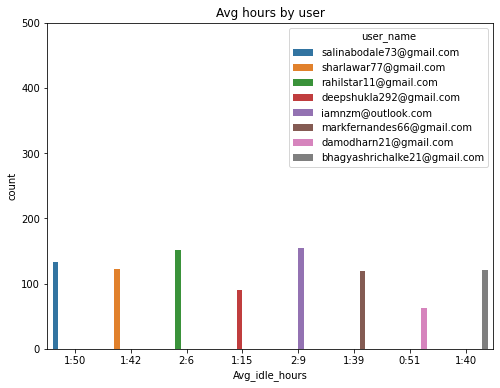

In [21]:
import seaborn as sns
from matplotlib import pyplot as plt

pdf5 = idle_hours.toPandas()
plt.figure(figsize = (8,6))
sns.barplot(x = 'Avg_idle_hours',y='count',data = pdf5,hue='user_name')
plt.title("Avg hours by user")
plt.ylim(0,500)
plt.show()

In [22]:
idle_hours.createOrReplaceTempView("idle_hrs_view")

Getting the user with highest and lowest idle hours

In [23]:
spark.sql("SELECT user_name as `user with highest idle hour`,Avg_idle_hours  FROM idle_hrs_view WHERE Avg_idle_hours = (SELECT MAX(Avg_idle_hours) FROM idle_hrs_view)").show()

+---------------------------+--------------+
|user with highest idle hour|Avg_idle_hours|
+---------------------------+--------------+
|         iamnzm@outlook.com|           2:9|
+---------------------------+--------------+



In [24]:
spark.sql("SELECT user_name as `user with lowest idle hour`,Avg_idle_hours  FROM idle_hrs_view WHERE Avg_idle_hours = (SELECT MIN(Avg_idle_hours) FROM idle_hrs_view)").show()

+--------------------------+--------------+
|user with lowest idle hour|Avg_idle_hours|
+--------------------------+--------------+
|      damodharn21@gmail...|          0:51|
+--------------------------+--------------+

